# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**

1. По формуле с лекции (и семинара): 
$$
  \widehat{\theta} = (X^TX)^{-1}X^Ty
$$

Наш случай - одномерный, поэтому формула преобразуется в:
$$ 
  \widehat{\theta} = \sum_{k=1}^n ({x_k^2})^-1*\sum_{k=1}^n x_ky_k = \frac{\sum_{k=1}^n x_ky_k}{\sum_{k=1}^n {x_k^2}}
$$

2. Градиентный спуск:
$$ 
  \theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta_t) = 
  \theta_t - \eta X^T (X \theta_t - Y) = \theta_t - \eta \sum_{k=1}^n{x_k (\theta_t x_k - y_k)}
$$
где $J(\theta_t)$ - функция потерь. По сути, каждый раз идем против градиента, оптимизируя потери.

3. Стохастический градиентный спуск - выбираем некоторый набор (подмножество) данных - батч, и подбираем коэффициенты методом градиентного спуска на этом подмножестве:
$$
  \theta_{t+1} = \theta_t - \eta \sum \limits_{i \in I}{x_k (\theta_t x_k - y_k)}
$$
Батч - набор элементов из индексов (1,...n), выбранных случайным образом (из равномерного распределения).

4. В случае большой ошибки и градиент будет большим, что может привести к "выбросам" коэффициентов: то есть функций потерь будет скачкообразной, не монотонно убывая к нулю.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

Загрузим данные.

In [5]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Выбираем признаки, с которыми будем работать, и целевой признак.

In [6]:
features_columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]
target_column = "cnt"

X, y = bike_sharing[features_columns], bike_sharing[target_column]

Разделим на тренировочную и тестовую выборки.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

Создаем датасет только с тренировочными данными

In [8]:
bike_train = pd.concat([X_train, y_train], axis=1)
bike_test = pd.concat([X_test, y_test], axis=1)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Сначала посмотрим на признаки, зависящие от времени: дня недели, месяца, сезона.

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13152\1140159906.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=bike_train,
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13152\1140159906.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=bike_train,


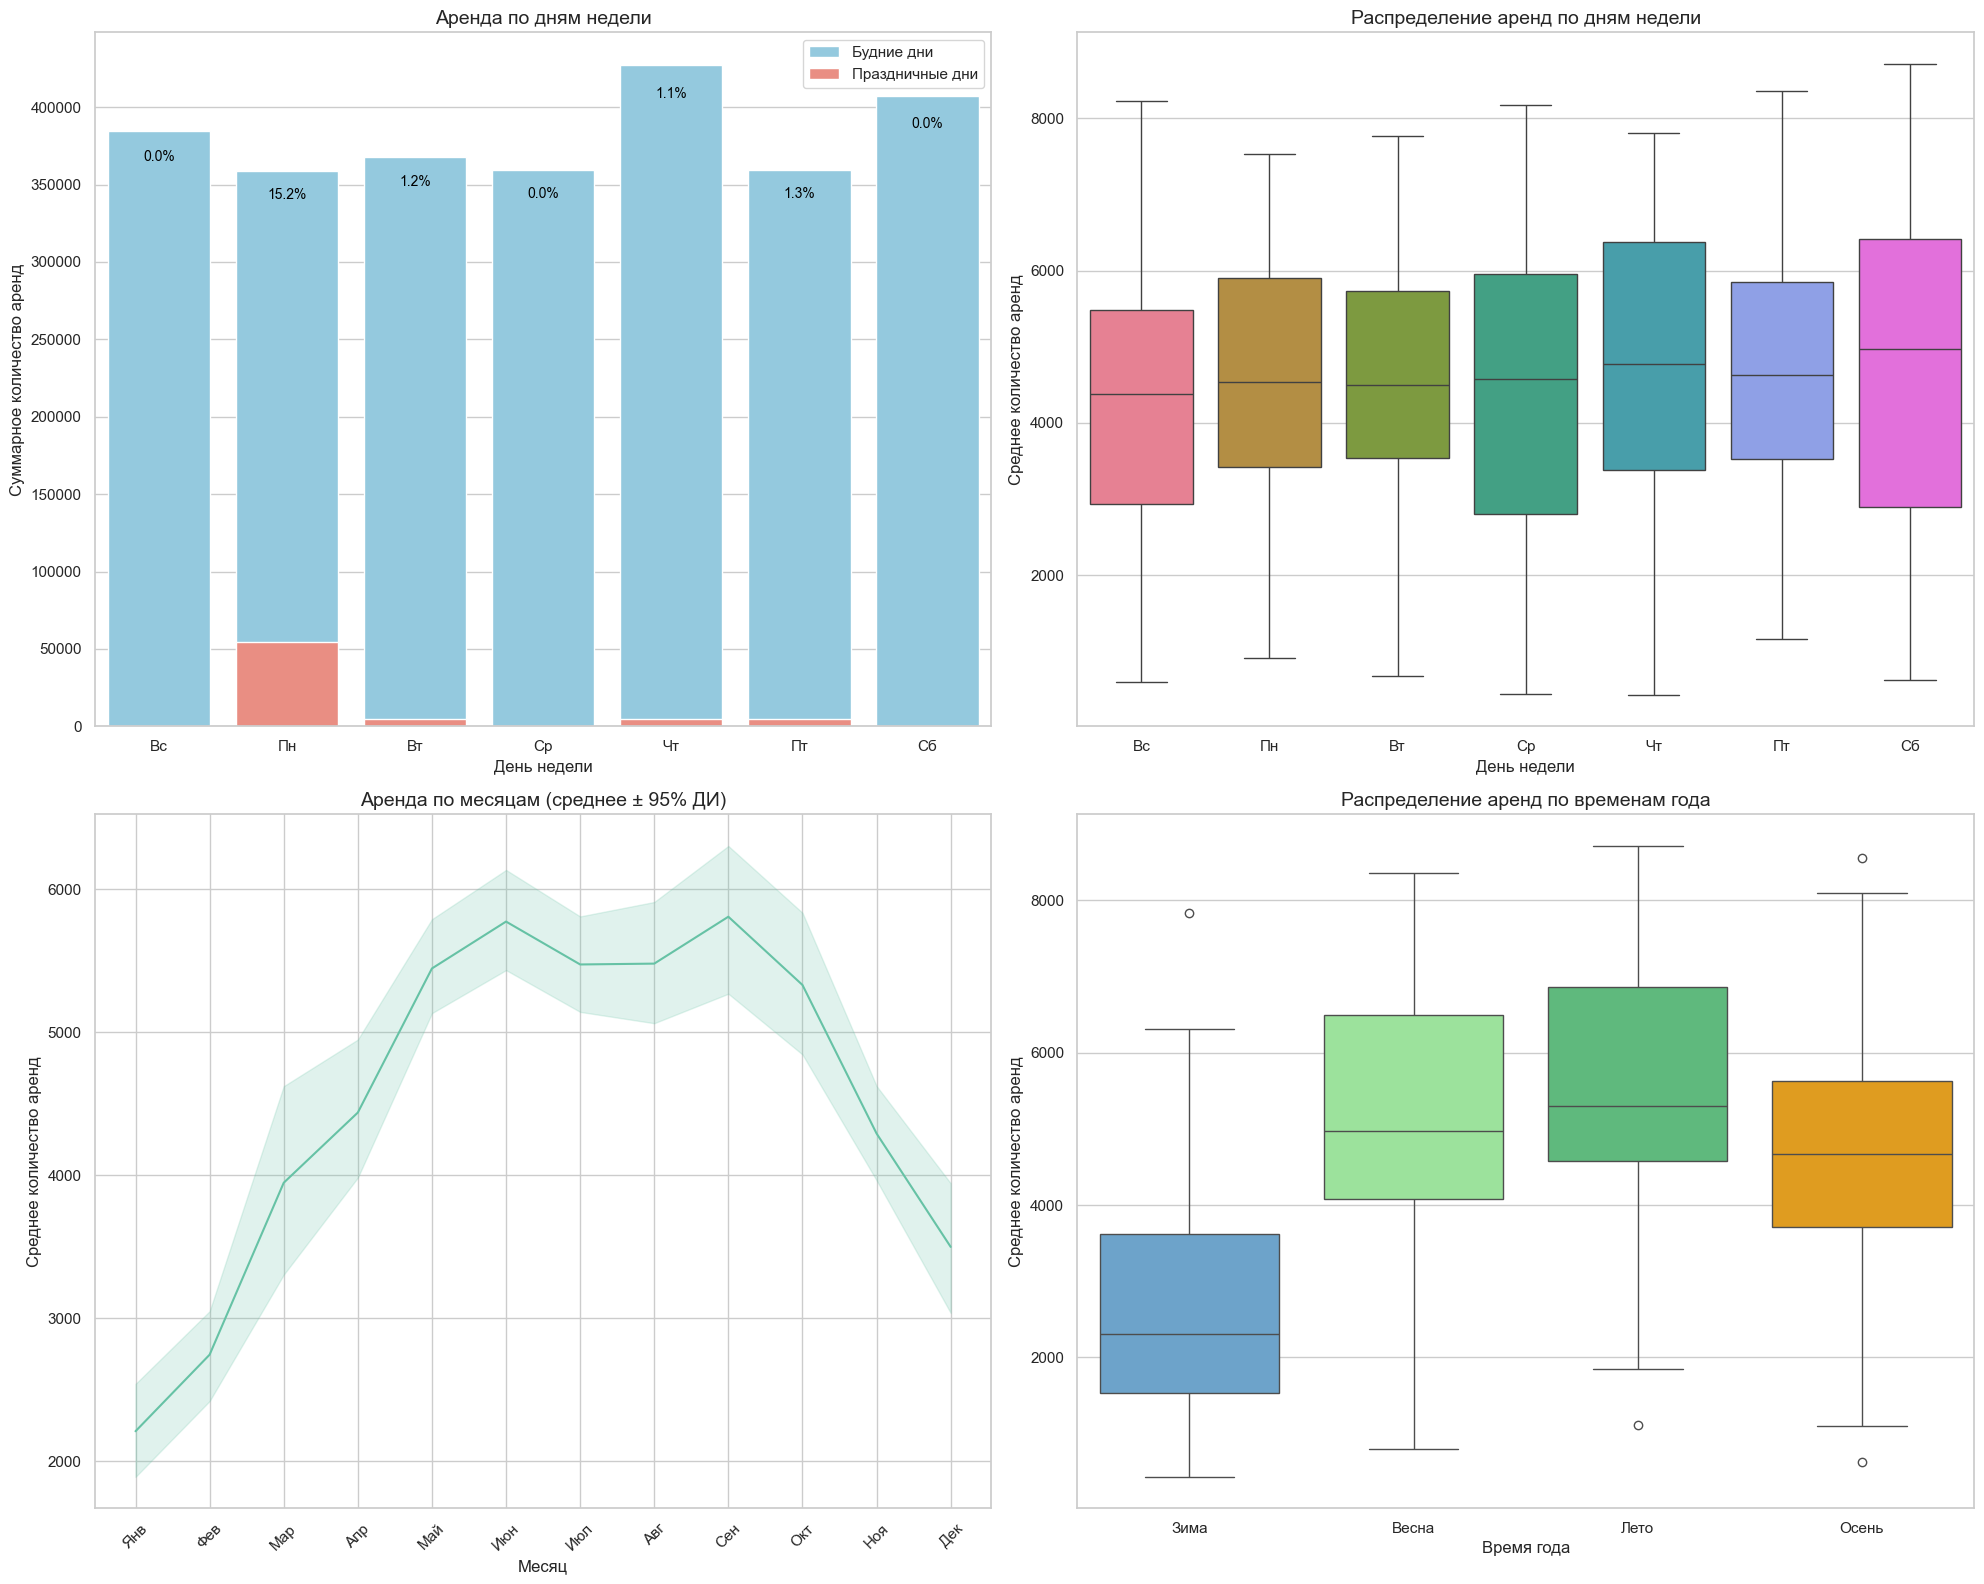

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

days = ["Вс", "Пн", "Вт", "Ср", "Чт", "Пт", "Сб"]
months = ["Янв", "Фев", "Мар", "Апр", "Май", "Июн", 
          "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"]

# График 1: График по дням недели (суммарное количество)
daily_data = bike_train.groupby('weekday').agg(
    total_cnt=('cnt', 'sum'),
    holiday_part=('holiday', 'mean')
).reset_index()

sns.barplot(data=daily_data, x='weekday', y='total_cnt', 
            color='skyblue', label='Будние дни', ax=axes[0, 0])
sns.barplot(data=daily_data, x='weekday', 
            y=daily_data['total_cnt'] * daily_data['holiday_part'], 
            color='salmon', label='Праздничные дни', ax=axes[0, 0])

axes[0, 0].set_title("Аренда по дням недели", fontsize=14)
axes[0, 0].set_xlabel("День недели", fontsize=12)
axes[0, 0].set_ylabel("Суммарное количество аренд", fontsize=12)
axes[0, 0].set_xticks(range(7))
axes[0, 0].set_xticklabels(days)
axes[0, 0].legend()

for i, (total, part) in enumerate(zip(daily_data['total_cnt'], daily_data['holiday_part'])):
    axes[0, 0].text(i, total * 0.95, f"{part:.1%}", 
                   ha='center', color='black', fontsize=10)

# График 2: График по дням недели 
sns.boxplot(x='weekday', y='cnt', data=bike_train,
            palette='husl', ax=axes[0, 1])
axes[0, 1].set_title("Распределение аренд по дням недели", fontsize=14)
axes[0, 1].set_xlabel("День недели", fontsize=12)
axes[0, 1].set_ylabel("Среднее количество аренд", fontsize=12)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(days)

# График 3: График по месяцам
sns.lineplot(data=bike_train, x="mnth", y="cnt", 
             errorbar=('ci', 95), ax=axes[1, 0])
axes[1, 0].set_title("Аренда по месяцам (среднее ± 95% ДИ)", fontsize=14)
axes[1, 0].set_xlabel("Месяц", fontsize=12)
axes[1, 0].set_ylabel("Среднее количество аренд", fontsize=12)
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(months, rotation=45)

# График 4: График по временам года
custom_palette = {
    '1': "#5DA5DA",
    '2': "#90EE90",
    '3': "#50C878",
    '4': "#FFA500"
}

sns.boxplot(x='season', y='cnt', data=bike_train,
            palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title("Распределение аренд по временам года", fontsize=14)
axes[1, 1].set_xlabel("Время года", fontsize=12)
axes[1, 1].set_ylabel("Среднее количество аренд", fontsize=12)
axes[1, 1].set_xticks(range(4))
axes[1, 1].set_xticklabels(['Зима', 'Весна', 'Лето', 'Осень'])

plt.tight_layout()
plt.show()

Теперь посмотрим на погодные признаки (влажность, температура, скорость ветра)

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13152\1655367264.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


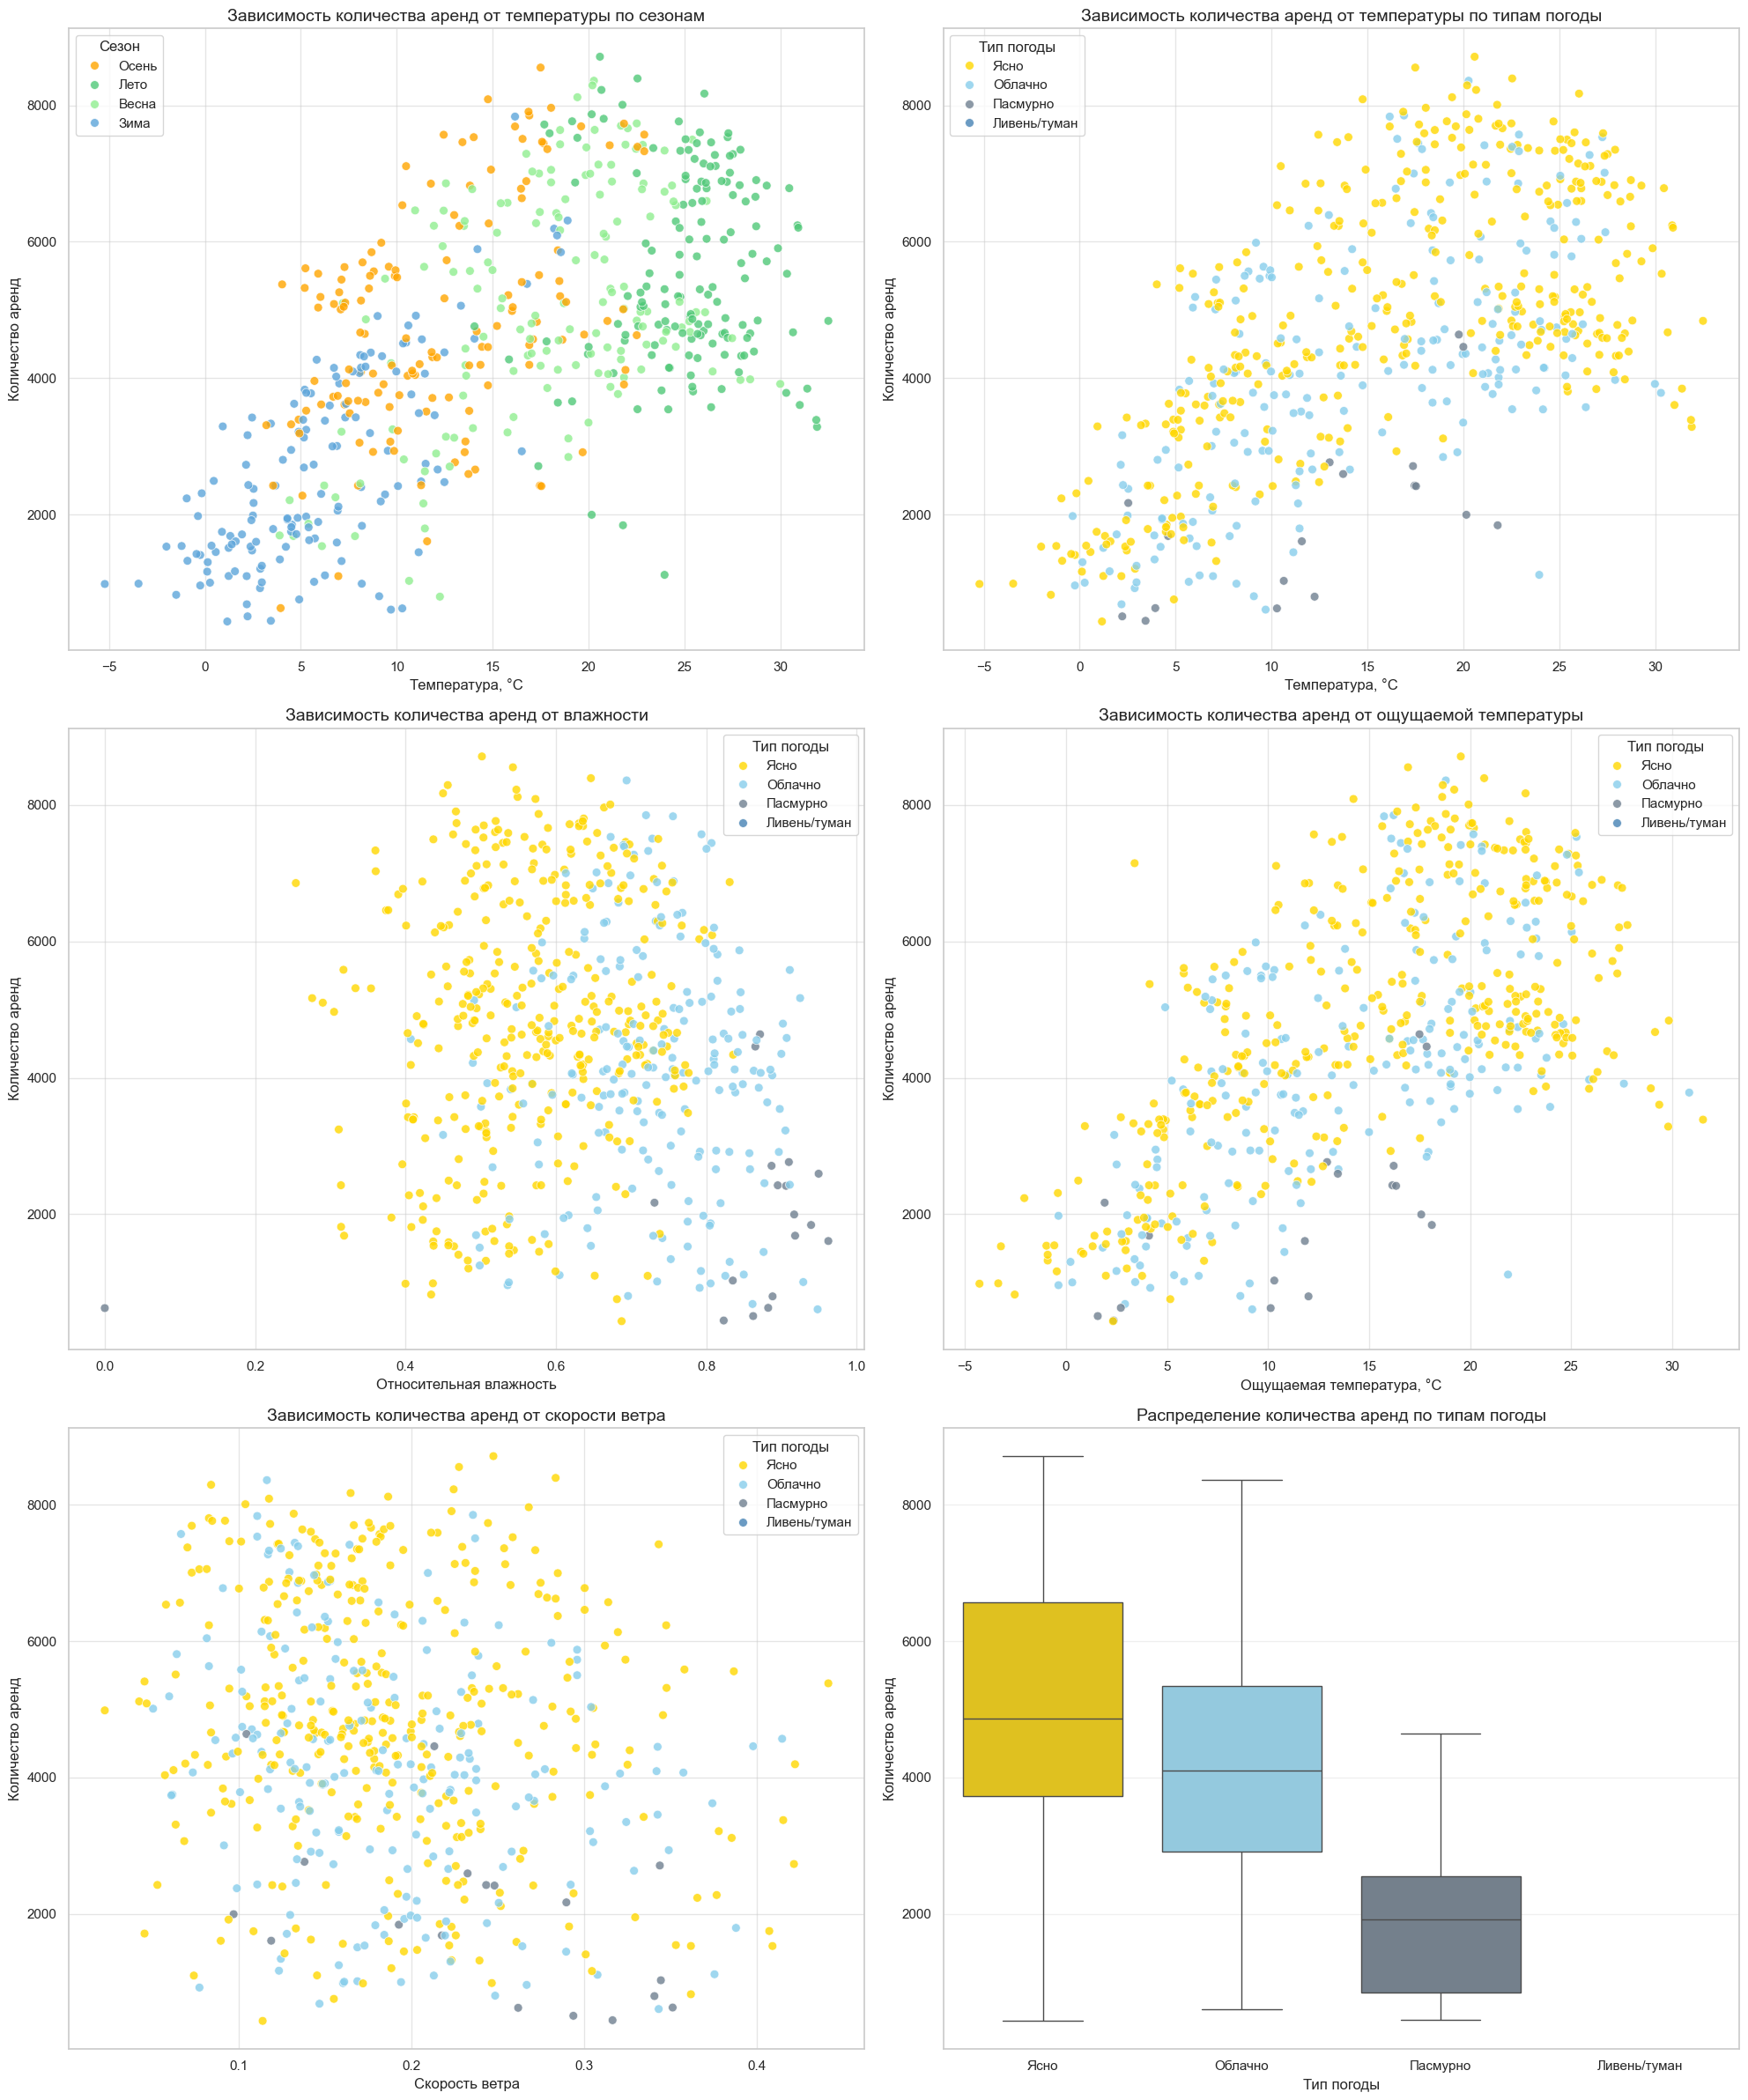

In [10]:
season_names = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
bike_train['season_name'] = bike_train['season'].map(season_names)
weathersit_names = {1: 'Ясно', 2: 'Облачно', 3: 'Пасмурно', 4: 'Ливень/туман'}
bike_train['weathersit_name'] = bike_train['weathersit'].map(weathersit_names)

bike_train['temp_C'] = 47 * bike_train['temp'] - 8
bike_train['atemp_C'] = 47 * bike_train['atemp'] - 8

season_palette = {'Зима': "#5DA5DA", 'Весна': "#90EE90", 'Лето': "#50C878", 'Осень': "#FFA500"}
weather_palette = {'Ясно': '#FFD700', 'Облачно': '#87CEEB', 'Пасмурно': '#708090', 'Ливень/туман': '#4682B4'}
weather_box_palette = {'1': '#FFD700', '2': '#87CEEB', '3': '#708090', '4': '#4682B4'}

fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# График 1: Температура по сезонам
sns.scatterplot(
    data=bike_train,
    x='temp_C',
    y='cnt',
    hue='season_name',
    palette=season_palette,
    alpha=0.8,
    s=50,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Зависимость количества аренд от температуры по сезонам', fontsize=14)
axes[0, 0].set_xlabel('Температура, °C', fontsize=12)
axes[0, 0].set_ylabel('Количество аренд', fontsize=12)
axes[0, 0].grid(alpha=0.5)
axes[0, 0].legend(title='Сезон', loc='upper left')

# График 2: Температура по типам погоды
sns.scatterplot(
    data=bike_train,
    x='temp_C',
    y='cnt',
    hue='weathersit_name',
    hue_order=['Ясно', 'Облачно', 'Пасмурно', 'Ливень/туман'],
    palette=weather_palette,
    alpha=0.8,
    s=50,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Зависимость количества аренд от температуры по типам погоды', fontsize=14)
axes[0, 1].set_xlabel('Температура, °C', fontsize=12)
axes[0, 1].set_ylabel('Количество аренд', fontsize=12)
axes[0, 1].grid(alpha=0.5)
axes[0, 1].legend(title='Тип погоды', loc='upper left')

# График 3: Влажность
sns.scatterplot(
    data=bike_train,
    x='hum',
    y='cnt',
    hue='weathersit_name',
    hue_order=['Ясно', 'Облачно', 'Пасмурно', 'Ливень/туман'],
    palette=weather_palette,
    alpha=0.8,
    s=50,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Зависимость количества аренд от влажности', fontsize=14)
axes[1, 0].set_xlabel('Относительная влажность', fontsize=12)
axes[1, 0].set_ylabel('Количество аренд', fontsize=12)
axes[1, 0].grid(alpha=0.5)
axes[1, 0].legend(title='Тип погоды', loc='upper right')

# График 4: Ощущаемая температура
sns.scatterplot(
    data=bike_train,
    x='atemp_C',
    y='cnt',
    hue='weathersit_name',
    hue_order=['Ясно', 'Облачно', 'Пасмурно', 'Ливень/туман'],
    palette=weather_palette,
    alpha=0.8,
    s=50,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Зависимость количества аренд от ощущаемой температуры', fontsize=14)
axes[1, 1].set_xlabel('Ощущаемая температура, °C', fontsize=12)
axes[1, 1].set_ylabel('Количество аренд', fontsize=12)
axes[1, 1].grid(alpha=0.5)
axes[1, 1].legend(title='Тип погоды', loc='upper right')

# График 5: Скорость ветра
sns.scatterplot(
    data=bike_train,
    x='windspeed',
    y='cnt',
    hue='weathersit_name',
    hue_order=['Ясно', 'Облачно', 'Пасмурно', 'Ливень/туман'],
    palette=weather_palette,
    alpha=0.8,
    s=50,
    ax=axes[2, 0]
)
axes[2, 0].set_title('Зависимость количества аренд от скорости ветра', fontsize=14)
axes[2, 0].set_xlabel('Скорость ветра', fontsize=12)
axes[2, 0].set_ylabel('Количество аренд', fontsize=12)
axes[2, 0].grid(alpha=0.5)
axes[2, 0].legend(title='Тип погоды', loc='upper right')

# График 6: Boxplot по типам погоды
sns.boxplot(
    x='weathersit',
    y='cnt',
    data=bike_train,
    palette=weather_box_palette,
    order=['1', '2', '3', '4'],
    ax=axes[2, 1]
)
axes[2, 1].set_title("Распределение количества аренд по типам погоды", fontsize=14)
axes[2, 1].set_xlabel("Тип погоды", fontsize=12)
axes[2, 1].set_ylabel("Количество аренд", fontsize=12)
axes[2, 1].set_xticks([0, 1, 2, 3])
axes[2, 1].set_xticklabels(['Ясно', 'Облачно', 'Пасмурно', 'Ливень/туман'])
axes[2, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

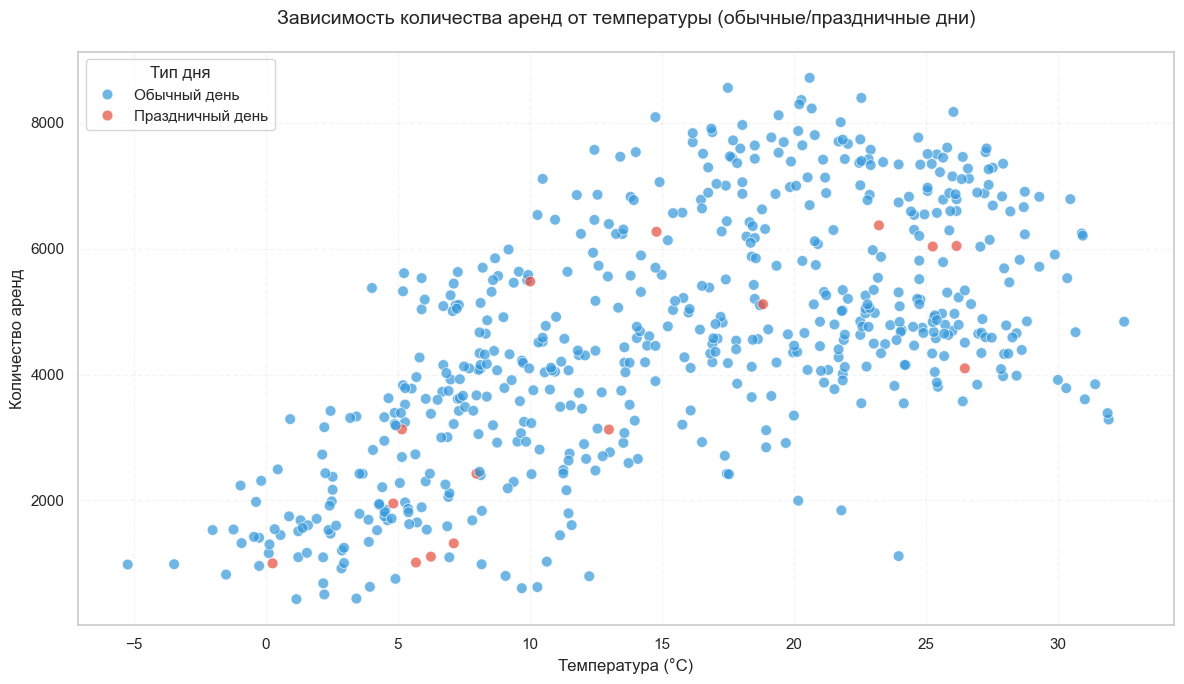

In [11]:
bike_train['day_type'] = bike_train['holiday'].map({0: 'Обычный день', 1: 'Праздничный день'})

bike_train['temp_C'] = 47 * bike_train['temp'] - 8

palette = {'Обычный день': '#3498db', 'Праздничный день': '#e74c3c'}

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=bike_train,
    x='temp_C',
    y='cnt',
    hue='day_type',
    palette=palette,
    alpha=0.7,
    s=60
)

plt.title('Зависимость количества аренд от температуры (обычные/праздничные дни)', fontsize=14, pad=20)
plt.xlabel('Температура (°C)', fontsize=12)
plt.ylabel('Количество аренд', fontsize=12)
plt.grid(alpha=0.2, linestyle='--')

plt.legend(
    title='Тип дня',
    loc='upper left'
)

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
1. Графики по времени: по графикам зависимости количества аренд от дня недели видим, что как таковых пиков (т.е. особых дней) нет, не выделяются в том числе выходные и дни с наибольшим количеством пришедшихся на них праздничных дней (топ-1 - понедельник). Поэтому в дальнейшем при анализе графиков по погодным условиям не будем использовать разделение по дням недели. По графику зависимости аренд от месяца видим два пика - в июне и сентябре, стабильно высокие значения летом и низкие зимой. Это также подтверждается графиком зависимости аренд от сезона: летом среднее количество аренд наибольшее, зимой наименьшее.
2. Графики по погодным условиям: из графика зависимости аренд от температуры по сезонам можем увидеть, что хоть время года и влияет на число аренд, преимущественно все зависит от температуры воздуха: в летние дни с низкой температурой число аренд ниже, чем в осенние с высокой. Из графика по типам погоды можем также заметить, что тип влияет на число аренд, что особенно заметно по пасмурной погоде: в пасмурные дни с достаточно высокой температурой воздуха количество аренд снижается, что особенно сказывается на точках, которые сильно выделяются из общей массы (однако могу заметить, что относительно ясных и облачных дней информации по пасмурным меньше, что может некорректно повлиять на интерпретацию). Зависимость среднего количество аренд от типа погоды (чем лучше погода, тем больше аренд) также подтверждает шестой график (boxplot). Из графиков по скорости ветра и влажности видно, что эти параметры не так сильно влияют на количество аренд, а из графика по ощущаемой температуре - что зависимости практически совпадают с температурой обычной (что в целом логично). 
3. Из последнего графика видим, что праздничные дни не сильно влияют на среднее количество аренд (т.е. выбросы "выше среднего" этим параметром не объясняются).

Все зависимости в целом похожи на линейные, но возможно для более точного результата я бы использовала логарифмическую или квадратичную зависимости.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Проведем стандартизацию данных

**б).** Удалим пропуски, если такие имеются

**в).** Удалим выбросы, опираясь на визуальный анализ

Реализуйте данную процедуру.

Сначала разделим на категориальные, числовые и целевой признаки:

In [12]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

а). Уже сделано в изначальном датасете для числовых признаков

б). Пропуски в датасете отсутствуют:

In [13]:
bike_train.isna().sum()

season             0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
cnt                0
season_name        0
weathersit_name    0
temp_C             0
atemp_C            0
day_type           0
dtype: int64

в). На основании графиков удалим выбросы:

In [14]:
mask = ((bike_train['season'] == 3) & (bike_train['cnt'] < 3000) | 
    (bike_train['season'] == 1) & (bike_train['cnt'] > 7000) |
    ((bike_train['season'].isin([2, 4])) & (bike_train['cnt'] < 1000)))

bike_train_cleaned = bike_train[~mask]

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

Закодируем категориальные признаки

In [15]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(bike_train_cleaned[categorical_features])
train_cat

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]], shape=(577, 24))

Объединяем все признаки вместе

In [16]:
X_train = np.hstack([bike_train_cleaned[real_features], train_cat])
X_train.shape

(577, 28)

Обучим модель и посмотрим на полученные коэффициенты

In [17]:
model = LinearRegression()
model.fit(X_train, bike_train_cleaned[target_feature])
print(model.coef_)
print(model.intercept_)

[ 7291.46161474  -424.77149302 -2875.69839869 -2671.51039507
  1098.39730434   803.26843527  1586.22942623    67.23265424
   286.10510918  -328.01407514  -133.70176208  -657.79443859
 -1222.0517021   -699.87605015   393.78477059   155.44281796
  -316.187795    -102.05691715  -351.80226316    25.57970769
   -74.99336236   -28.56633737   -72.1803722    117.63145874
   487.04846926   319.27335766  -274.73132946 -1583.65561058]
2662.5070739819607


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

Применим на тестовой выборке те же фильтры, что и на обучающей.

In [18]:
mask_test = ((bike_test['season'] == 3) & (bike_test['cnt'] < 3000) | 
    (bike_test['season'] == 1) & (bike_test['cnt'] > 7000) |
    ((bike_test['season'].isin([2, 4])) & (bike_test['cnt'] < 1000)))

bike_test_cleaned = bike_test[~mask_test]

Закодируем тестовые данные и просчитаем ошибки:

In [19]:
test_cat = encoder.transform(bike_test_cleaned[categorical_features])
X_test = np.hstack([bike_test_cleaned[real_features], test_cat])

y_pred = model.predict(X_test)
y_true = bike_test_cleaned[target_feature]

rmse = metrics.mean_squared_error(y_true, y_pred) ** 0.5
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = metrics.mean_absolute_percentage_error(y_true, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4%}')

RMSE: 1351.7147
MAE: 1177.8176
MAPE: 34.2783%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

Явная формула для расчета коэффициентов:
$$
  \widehat{\theta} = (X^TX)^{-1}X^Ty
$$

In [21]:
y = bike_train_cleaned['cnt'].values
x = np.column_stack([np.ones(len(X_train)), X_train])

theta_hat = np.linalg.inv(x.T @ x) @ x.T @ y

cat_feature_names = []
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i][1:]
    cat_feature_names.extend([f"{feature}_{cat}" for cat in categories])

all_feature_names = real_features + cat_feature_names
feature_names = ['intercept'] + all_feature_names

results = pd.DataFrame({
    'Признак': ['intercept'] + all_feature_names,
    'Коэф (модель)': [model.intercept_] + list(model.coef_),
    'Коэф (явный расчет)': theta_hat,
    'Разница': [model.intercept_ - theta_hat[0]] + list(model.coef_ - theta_hat[1:])
})

pd.options.display.float_format = '{:.4f}'.format

print("Сравнение коэффициентов:")
print(results)

Сравнение коэффициентов:
         Признак  Коэф (модель)  Коэф (явный расчет)    Разница
0      intercept      2662.5071            2338.4041   324.1030
1           temp      7291.4616            1478.4368  5813.0248
2          atemp      -424.7715            5405.3405 -5830.1120
3            hum     -2875.6984           -1247.6680 -1628.0304
4      windspeed     -2671.5104           -1844.6277  -826.8827
5       season_2      1098.3973            1181.1372   -82.7398
6       season_3       803.2684             564.5382   238.7302
7       season_4      1586.2294            1629.3647   -43.1352
8         mnth_2        67.2327             522.7193  -455.4867
9         mnth_3       286.1051             129.6067   156.4984
10        mnth_4      -328.0141             -93.0082  -235.0059
11        mnth_5      -133.7018             117.4053  -251.1071
12        mnth_6      -657.7944            -117.3958  -540.3986
13        mnth_7     -1222.0517            -438.4887  -783.5630
14        mnth_

Заметно, что коэффициенты слабо совпадают друг с другом. Возможно, это происходит из-за того, что есть сильно зависимые друг от друга показатели. Логически подумав (а также методом проб и ошибок), выявила, что зависимые признаки: temp и atemp, season и mnth, holiday и workingday. Удалив один признак из каждой пары, получаем хороший результат:

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [22]:
categorical_features = ['mnth', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']

encoder = OneHotEncoder(drop="first", sparse_output=False)
train_cat = encoder.fit_transform(bike_train_cleaned[categorical_features])
X_train = np.hstack([bike_train_cleaned[real_features], train_cat])

model = LinearRegression()
model.fit(X_train, bike_train_cleaned[target_feature])

y = bike_train_cleaned['cnt'].values
x = np.column_stack([np.ones(len(X_train)), X_train])

theta_hat = np.linalg.inv(x.T @ x) @ x.T @ y

cat_feature_names = []
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i][1:]
    cat_feature_names.extend([f"{feature}_{cat}" for cat in categories])

all_feature_names = real_features + cat_feature_names
feature_names = ['intercept'] + all_feature_names

results = pd.DataFrame({
    'Признак': ['intercept'] + all_feature_names,
    'Коэф (модель)': [model.intercept_] + list(model.coef_),
    'Коэф (явный расчет)': theta_hat,
    'Разница': [model.intercept_ - theta_hat[0]] + list(model.coef_ - theta_hat[1:])
})

pd.options.display.float_format = '{:.4f}'.format

print("Сравнение коэффициентов:")
print(results)

Сравнение коэффициентов:
         Признак  Коэф (модель)  Коэф (явный расчет)  Разница
0      intercept      2669.5700            2669.5700   0.0000
1           temp      7011.9043            7011.9043   0.0000
2            hum     -2860.1391           -2860.1391   0.0000
3      windspeed     -2952.7986           -2952.7986   0.0000
4         mnth_2        62.7428              62.7428  -0.0000
5         mnth_3       686.5207             686.5207  -0.0000
6         mnth_4       750.9076             750.9076  -0.0000
7         mnth_5       914.5339             914.5339  -0.0000
8         mnth_6       284.9745             284.9745  -0.0000
9         mnth_7      -483.5192            -483.5192  -0.0000
10        mnth_8        44.1391              44.1391  -0.0000
11        mnth_9      1342.1127            1342.1127  -0.0000
12       mnth_10      1699.7038            1699.7038  -0.0000
13       mnth_11      1246.2048            1246.2048  -0.0000
14       mnth_12       906.8359             9

Считаем ошибку предсказания

In [23]:
mask_test = ((bike_test['season'] == 3) & (bike_test['cnt'] < 3000) | 
    (bike_test['season'] == 1) & (bike_test['cnt'] > 7000) |
    ((bike_test['season'].isin([2, 4])) & (bike_test['cnt'] < 1000)))

bike_test_cleaned = bike_test[~mask_test]

test_cat = encoder.transform(bike_test_cleaned[categorical_features])
X_test = np.hstack([bike_test_cleaned[real_features], test_cat])

y_pred = model.predict(X_test)
y_true = bike_test_cleaned[target_feature]

rmse = metrics.mean_squared_error(y_true, y_pred) ** 0.5
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = metrics.mean_absolute_percentage_error(y_true, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4%}')

RMSE: 1388.4822
MAE: 1199.6672
MAPE: 35.8110%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

Эксперимент показал, что модель линейной регрессии хорошо работает только при использовании независимых друг от друга признаков. После удаления зависимых мы получили значения коэффициентов, совпадающие с явно вычисленными через формулу линейной регрессии. Однако значения ошибок увеличились после удаления примерно на 1%. Возможно это связано с тем, что по меньшему числу признаков модели сложнее делать точные предсказания.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

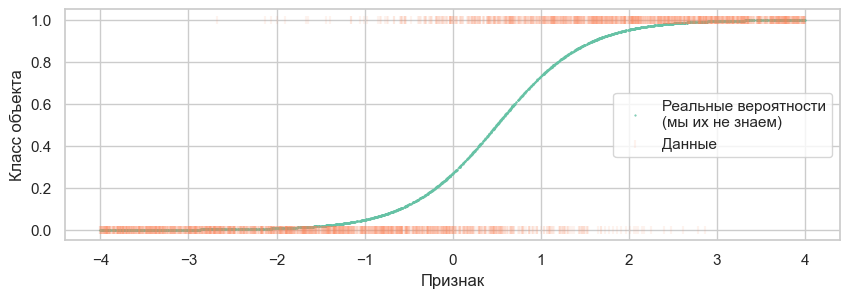

In [182]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend()

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [186]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Напечатайте оценку коэффициентов

In [187]:
print(model.coef_)
print(model.intercept_)

[[1.87358729]]
[-0.8123768]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

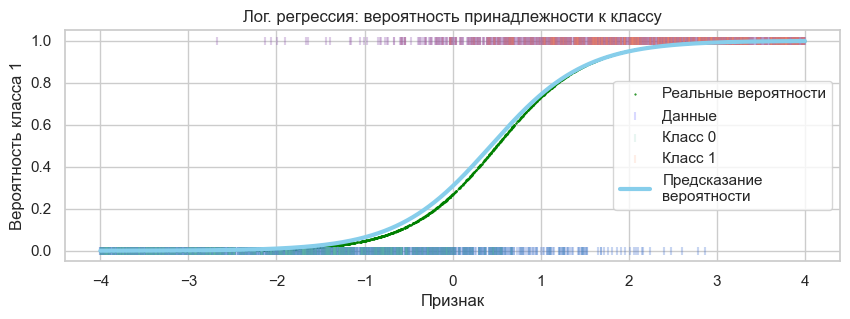

In [218]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
probabilities = model.predict_proba(X_grid)[:, 1]

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, color = 'green', label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.15, color = 'blue', label="Данные")

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), marker="|", label="Класс 0", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]),  marker="|", label="Класс 1", alpha=0.15)
plt.plot(X_grid, probabilities, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

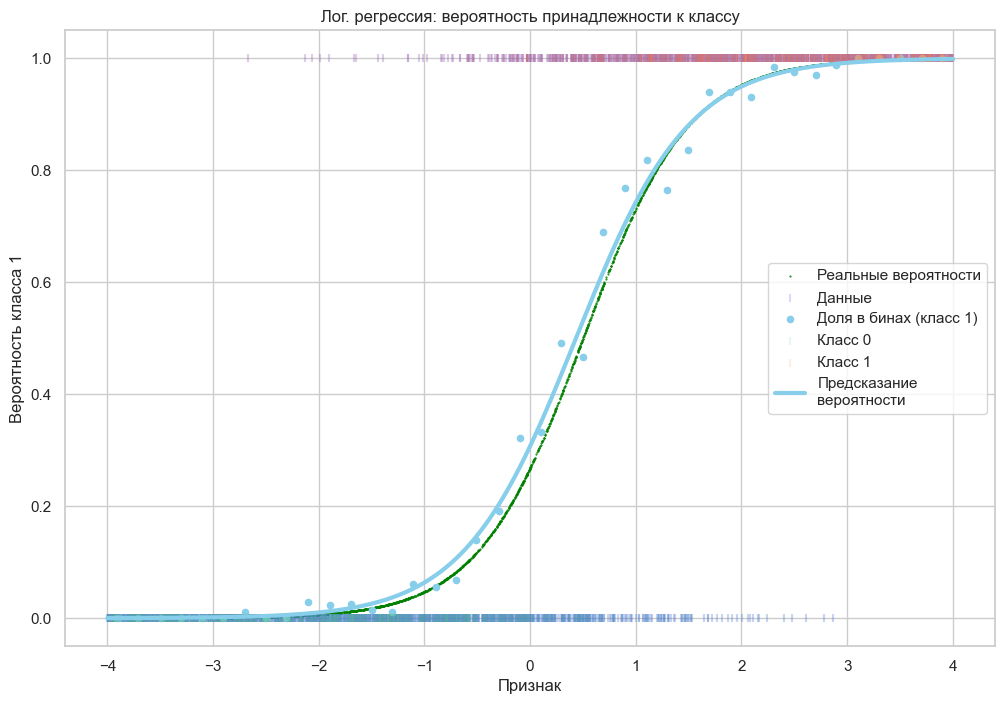

In [226]:
bins = np.arange(-4, 4.1, 0.2)
tmp_df = pd.DataFrame({
    'X': X.flatten(),
    'y': y,
    'bin': np.digitize(X.flatten(), bins)
})
bins_mean_y = tmp_df.groupby('bin')['y'].mean()
bins_mean_x = tmp_df.groupby('bin')['X'].mean()

plt.figure(figsize=(12, 8))
plt.scatter(X, y_mean_true, marker=".", s=1, color = 'green', label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.15, color = 'blue', label="Данные")
plt.scatter(bins_mean_x, bins_mean_y, marker = 'o', s=20, color = 'skyblue', label="Доля в бинах (класс 1)")

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), marker="|", label="Класс 0", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]),  marker="|", label="Класс 1", alpha=0.15)
plt.plot(X_grid, probabilities, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()

Все точки, относящиеся к бинам, находятся в окрестности и предсказания вероятностей, и их реальных значений.

Повторите проведенное исследование для следующих данных и сравните результаты.

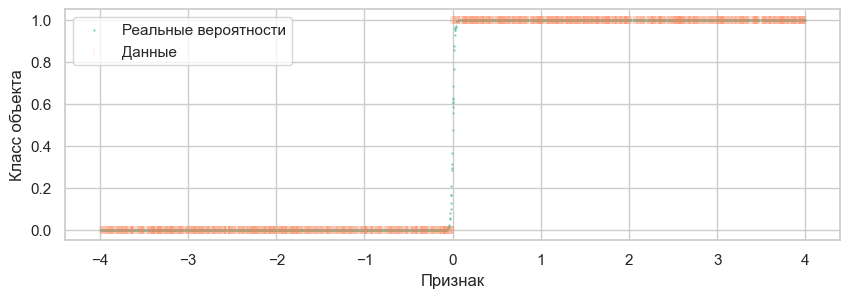

In [227]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend()

Обучим модель и напечатаем коэффициенты

In [228]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[[54.43547725]]
[-0.08781499]


Разобьем данные на бины

In [229]:
bins = np.arange(-4, 4.1, 0.2)
tmp_df = pd.DataFrame({
    'X': X.flatten(),
    'y': y,
    'bin': np.digitize(X.flatten(), bins)
})
bins_mean_y = tmp_df.groupby('bin')['y'].mean()
bins_mean_x = tmp_df.groupby('bin')['X'].mean()

Создадим график

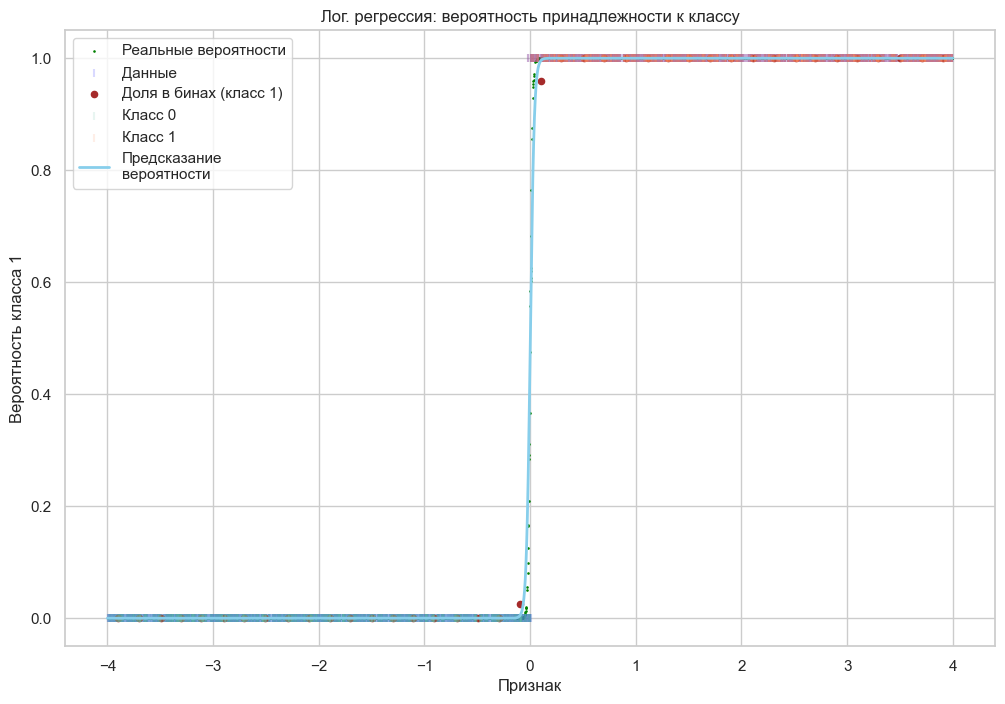

In [235]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
probabilities = model.predict_proba(X_grid)[:, 1]

plt.figure(figsize=(12, 8))
plt.scatter(X, y_mean_true, marker=".", s=3, color = 'green', label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.15, color = 'blue', label="Данные")
plt.scatter(bins_mean_x, bins_mean_y, marker = 'o', s=20, color = 'brown', label="Доля в бинах (класс 1)")

plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), marker="|", label="Класс 0", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]),  marker="|", label="Класс 1", alpha=0.15)
plt.plot(X_grid, probabilities, label="Предсказание\nвероятности", c="skyblue", linewidth=2)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()

**Выводы:**

В обоих случаях модель достаточно хорошо предсказывает поведение вероятностей, однако видно и по первому графику, и по второму (в точках перегиба), что модели "проще" работать с более гладкими функциями распределения реальных вероятностей.

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [236]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,1,1,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,1,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [268]:
class_part = pd.pivot_table(
    data, 
    values='target', 
    index=['feature_1', 'feature_2'],
    aggfunc=np.mean
)
class_part

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18384\2358163639.py:1: FutureWarning: The provided callable <function mean at 0x0000016AC468F600> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  class_part = pd.pivot_table(


target
feature_1 feature_2        
0         0          0.3613
          1          0.3762
1         0          0.2891
          1          0.3320

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

Обучим модель:

In [269]:
X = data[['feature_1', 'feature_2']]
y = data['target']

model = LogisticRegression(penalty=None)
model.fit(X, y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Считаем вероятность для всех комбинаций признаков:

In [ ]:
variants = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1]
})
prob_class1 = model.predict_proba(variants)[:, 1]

Сводим все в одну таблицу для удобства

In [271]:
class_part['pred_freq'] = prob_class1
class_part.rename(columns={'target': 'real_freq'}, inplace=True)

result = variants.merge(class_part, on=['feature_1', 'feature_2'], how='left')
result

,feature_1,feature_2,real_freq,pred_freq
0,0,0,0.3613,0.3536
1,0,1,0.3762,0.3848
2,1,0,0.2891,0.2964
3,1,1,0.3320,0.3250


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Вероятность принадлежности к классу 1 вычисляется по формуле $P(y=1|\mathbf{X}) = \sigma(z) = \frac{1}{1 + e^{-z}}$, 

где $z = w_0 + \sum_{j=1}^n w_j x_j = \mathbf{w}^T \mathbf{X}$

$w_0$ - свободный член

$w_j$ - вес j-го признака

$x_j$ - значение j-го признака

$n$ - количество признаков

Видно, что модель принимает комбинацию признаков как линейну. (т.е. логит z линейно зависим от признаков). Однако в реальности это может быть не так. 
Также используемые признаки должны независимы друг от друга как и в случае линейной регрессии.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

Попробуем добавить квадратичную зависимость от изначальных признаков. Сначала рассмотрим только добавление $x_1x_2$. 

Реализация:

Создаем набор новых признаков

In [279]:
X_poly = np.column_stack([
    X.values,
    X.values[:, 0] * X.values[:, 1]
])

Обучаем модель с использованием новых признаков

In [280]:
model = LogisticRegression(penalty=None)
model.fit(X_poly, y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Визуализируем результаты

In [ ]:
variants = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1]
})

variants['feature_1*feature_2'] = variants['feature_1']*variants['feature_2']

prob_class1_new = model.predict_proba(variants)[:, 1]

class_part['pred_freq_new'] = prob_class1_new
class_part.rename(columns={'target': 'real_freq'}, inplace=True)

result = variants.merge(class_part, on=['feature_1', 'feature_2'], how='left')
result[['feature_1', 'feature_2', 'real_freq', 'pred_freq', 'pred_freq_new']]

c:\Users\Пользователь\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,feature_1,feature_2,real_freq,pred_freq,pred_freq_new
0,0,0,0.3613,0.3536,0.3613
1,0,1,0.3762,0.3848,0.3762
2,1,0,0.2891,0.2964,0.2890
3,1,1,0.3320,0.3250,0.3320


Посмотрим, что будет, если также добавить квадратичные признаки $x_1^2$, $x_2^2$

In [282]:
X_poly = np.column_stack([
    X.values,
    X.values[:, 0]**2,
    X.values[:, 1]**2,
    X.values[:, 0] * X.values[:, 1]
])

model = LogisticRegression(penalty=None)
model.fit(X_poly, y)

variants = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1]
})
variants['feature_1^2'] = variants['feature_1']**2
variants['feature_2^2'] = variants['feature_2']**2
variants['feature_1*feature_2'] = variants['feature_1']*variants['feature_2']

prob_class1_new = model.predict_proba(variants)[:, 1]

class_part['pred_freq_new'] = prob_class1_new
class_part.rename(columns={'target': 'real_freq'}, inplace=True)

result = variants.merge(class_part, on=['feature_1', 'feature_2'], how='left')
result[['feature_1', 'feature_2', 'real_freq', 'pred_freq', 'pred_freq_new']]

c:\Users\Пользователь\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,feature_1,feature_2,real_freq,pred_freq,pred_freq_new
0,0,0,0.3613,0.3536,0.3606
1,0,1,0.3762,0.3848,0.3769
2,1,0,0.2891,0.2964,0.2896
3,1,1,0.3320,0.3250,0.3317


Результаты получились хуже по сравнению с первым вариантом.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

Эксперимент показал, что использование полностью линейных моделей (т.е. с линейной зависимостью логита от признаков) не всегда дает точные результаты и иногда необходимо добавить квадратичные зависимости (но не переборщить с ними, иначе результат получится не самый лучший).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.